Code from Joe Caracappa, NOAA

At the bottom you can adjust the "command" line to change your bounds or variable names. You'll have to hard-code your User ans Password for CMEMS too. 
You will also need Motuclient 1.8 or higher downloaded. See here for instructions https://marine.copernicus.eu/faq/what-are-the-motu-and-python-requirements/?idpage=169


In [1]:
import datetime
import pandas as pd
import os
from os import path

In [2]:
os.mkdir('U:/Documents/conda_dir/GLORYS_subsets')

In [5]:
#Set start and end year
year_start=1993
year_end= 2018
years=range(year_start,year_end+1)

In [3]:
#Input CMEMS User and Password (case sensitive)
USER = "user name here"
PASSWORD = "password here"

#Set Lat/lon bounds
# cropping to just iceland
min_lon = str(-31)
max_lon = str(-5.5)
min_lat = str(59.9)
max_lat = str(69.6)

In [4]:
# just do one to check
y = 0
d = 0
all_days = []

dt = datetime.datetime(1993,1,1)
end = datetime.datetime(1993,12,31)
step = datetime.timedelta(days = 1)
   
all_days = []
   
while dt <= end:
    all_days.append(dt.strftime('%Y-%m-%d'))
    dt += step
       
    
dt      
        

datetime.datetime(1994, 1, 1, 0, 0)

In [5]:
all_days[d]

'1993-01-01'

In [9]:
# delete 1993 files where I downloaded all the depth layers instead of just SST and BT
import glob
file_path = 'U:/Documents/conda_dir/GLORYS_subsets/GLORYS_REANALYSIS_1993' + '*.nc'
files_93 = glob.glob(file_path)
files_93

for file_to_delete in files_93:
        os.remove(file_to_delete)

In [7]:
for y in range(len(years)):
    
    dt = datetime.datetime(years[y],1,1)
    end = datetime.datetime(years[y],12,31)
    step = datetime.timedelta(days = 1)
   
    all_days = []
   
    while dt <= end:
        all_days.append(dt.strftime('%Y-%m-%d'))
        dt += step
       
    for d in range(len(all_days)):
        

        t1 = all_days[d]+" 00:00:00"
        t2 = all_days[d]+" 11:59:59"
        #Change to desired filename prefix
        new_name = "GLORYS_REANALYSIS_salinity"+all_days[d]+".nc"
        #Change to appropriate output path
        out_dir = 'U:/Documents/conda_dir/GLORYS_subsets/' #+ str(years[y])+'/'
        
       
        if(path.exists(out_dir+new_name)):
           print(new_name+" EXISTS")
           continue
           
        #print(new_name)
        #If additional variables are desired: need to add "--variable var.name"
       
        command = "python -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id GLOBAL_REANALYSIS_PHY_001_030-TDS --product-id global-reanalysis-phy-001-030-daily --longitude-min "+min_lon+" --longitude-max "+max_lon+" --latitude-min "+min_lat+" --latitude-max "+max_lat+" --date-min "+t1+" --date-max "+t2+" --depth-min 0.493 --depth-max 1  --variable salinity --out-dir "+out_dir+" --out-name "+new_name+" --user "+USER+" --pwd "+PASSWORD

        os.system(command)

In [10]:
# check if any are missing. suspect 4 are missing. should have 9490? missing last 6 days of december, have 9476
len(all_days) # 365

# https://stackoverflow.com/questions/993358/creating-a-range-of-dates-in-python
from datetime import datetime

full_dates = pd.date_range(start="1993-01-01",end="2018-12-31")
len (full_dates) # 9496

9496

In [11]:
# just did date check in R. missing 16. 
missing_dates = ["2000-02-04", "2001-05-10", "2002-07-07", "2002-07-08", "2002-07-09" ,"2002-07-10" ,"2003-07-30", "2006-09-07",
 "2006-11-23", "2008-11-07", "2009-02-13", "2009-03-31", "2010-12-13", "2013-02-19" ,"2013-09-27", "2013-10-05"]
len (missing_dates)

16

In [13]:

       
    for d in range(len(missing_dates)):
        

        t1 = missing_dates[d]+" 00:00:00"
        t2 = missing_dates[d]+" 11:59:59"
        #Change to desired filename prefix
        new_name = "GLORYS_REANALYSIS_"+missing_dates[d]+".nc"
        #Change to appropriate output path
        out_dir = 'U:/Documents/conda_dir/GLORYS_subsets/' #+ str(years[y])+'/'
        
       
        if(path.exists(out_dir+new_name)):
           print(new_name+" EXISTS")
           continue
           
        #print(new_name)
        #If additional variables are desired: need to add "--variable var.name"
       
        command = "python -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id GLOBAL_REANALYSIS_PHY_001_030-TDS --product-id global-reanalysis-phy-001-030-daily --longitude-min "+min_lon+" --longitude-max "+max_lon+" --latitude-min "+min_lat+" --latitude-max "+max_lat+" --date-min "+t1+" --date-max "+t2+" --depth-min 0.493 --depth-max 1 --variable bottomT --variable thetao --out-dir "+out_dir+" --out-name "+new_name+" --user "+USER+" --pwd "+PASSWORD

        os.system(command)

In [21]:
# quick check
import xarray as xr
tmp = xr.open_dataset('GLORYS_subsets/GLORYS_REANALYSIS_1993-01-01.nc')
tmp # depth 50, latitude 421, longitude 721, time 1

<xarray.Dataset>
Dimensions:    (depth: 50, latitude: 421, longitude: 721, time: 1)
Coordinates:
  * depth      (depth) float32 0.494025 1.541375 2.645669 ... 5274.784 5727.917
  * latitude   (latitude) float32 50.0 50.083332 50.166668 ... 84.916664 85.0
  * time       (time) datetime64[ns] 1993-01-01T12:00:00
  * longitude  (longitude) float32 -45.0 -44.916668 ... 14.916667 15.0
Data variables:
    thetao     (time, depth, latitude, longitude) float32 ...
    bottomT    (time, latitude, longitude) float32 ...
Attributes:
    title:                              daily mean fields from Global Ocean P...
    easting:                            longitude
    northing:                           latitude
    history:                            2019/04/04 11:59:50 MERCATOR OCEAN Ne...
    source:                             MERCATOR GLORYS12V1
    institution:                        MERCATOR OCEAN
    references:                         http://www.mercator-ocean.fr
    comment:                            CMEMS product
    Conventions:                        CF-1.4
    domain_name:                        GL12
    FROM_ORIGINAL_FILE__field_type:     mean
    field_date:                         2018-12-25 00:00:00
    field_julian_date:                  25195.0
    julian_day_unit:                    days since 1950-01-01 00:00:00
    bulletin_date:                      2018-12-26 00:00:00
    bulletin_type:                      operational
    FROM_ORIGINAL_FILE__longitude_min:  -180.0
    FROM_ORIGINAL_FILE__longitude_max:  179.91667
    FROM_ORIGINAL_FILE__latitude_min:   -80.0
    FROM_ORIGINAL_FILE__latitude_max:   90.0
    z_min:                              0.494025
    z_max:                              5727.917
    forecast_range:                     6-day_forecast
    forecast_type:                      hindcast
    _CoordSysBuilder:                   ucar.nc2.dataset.conv.CF1Convention

In [22]:
tmp.nbytes/1e6 # 61mb

61.92714

In [23]:
tmp.thetao.shape # 1, 50, 421, 721

(1, 50, 421, 721)

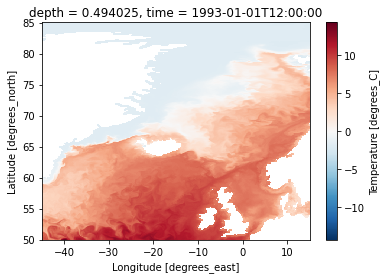

In [24]:
tmp.thetao.isel(depth = 0).plot()

In [25]:
tmp.bottomT.shape # 1, 421, 721

(1, 421, 721)

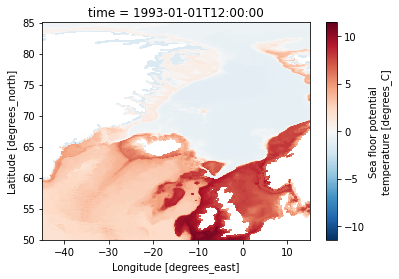

In [26]:
tmp.bottomT.plot()